In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("cricket_data_2025.csv")
data.head(5)

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,NaN,Aaron Hardie,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,...,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats
1,2024.0,Abdul Samad,16,2,182,37*,18.2,108,168.52,0,...,16,0,0,0,0,0,0,0,0,0
2,2023.0,Abdul Samad,9,4,169,37*,42.25,128,132.03,0,...,9,0,0,0,0,0,0,0,0,0
3,2022.0,Abdul Samad,2,0,4,4,2.0,7,57.14,0,...,2,6,8,0,0/8,0,8.00,0,0,0
4,2021.0,Abdul Samad,11,1,111,28,12.33,87,127.58,0,...,11,6,9,1,1/9,9.00,9.00,6.00,0,0


In [4]:
data.isnull().sum()

Year                   51
Player_Name             0
Matches_Batted          0
Not_Outs                0
Runs_Scored             0
Highest_Score           0
Batting_Average         0
Balls_Faced             0
Batting_Strike_Rate     0
Centuries               0
Half_Centuries          0
Fours                   0
Sixes                   0
Catches_Taken           0
Stumpings               0
Matches_Bowled          0
Balls_Bowled            0
Runs_Conceded           0
Wickets_Taken           0
Best_Bowling_Match      0
Bowling_Average         0
Economy_Rate            0
Bowling_Strike_Rate     0
Four_Wicket_Hauls       0
Five_Wicket_Hauls       0
dtype: int64

In [5]:
data=data.dropna()

In [6]:
data.duplicated().sum()

0

In [30]:
sns.set_style("whitegrid")

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_37973/2879539607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Wickets_Taken', data=data, palette='coolwarm')


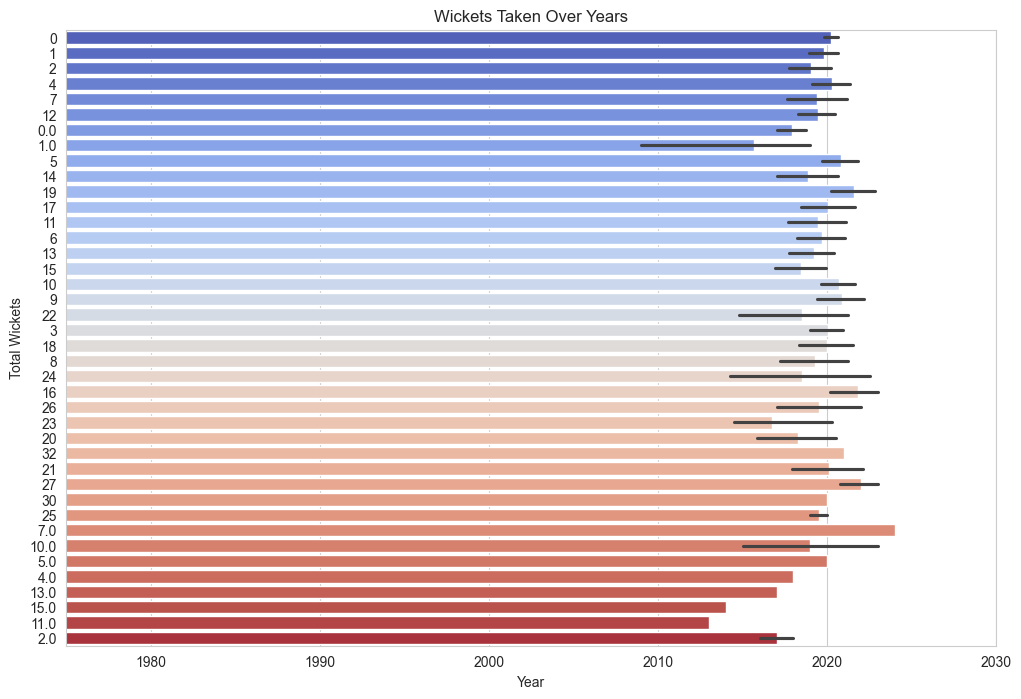

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Wickets_Taken', data=data, palette='coolwarm')
plt.title('Wickets Taken Over Years')
plt.ylabel('Total Wickets')
plt.xlabel('Year')
plt.xlim(1975,2030)
plt.show()

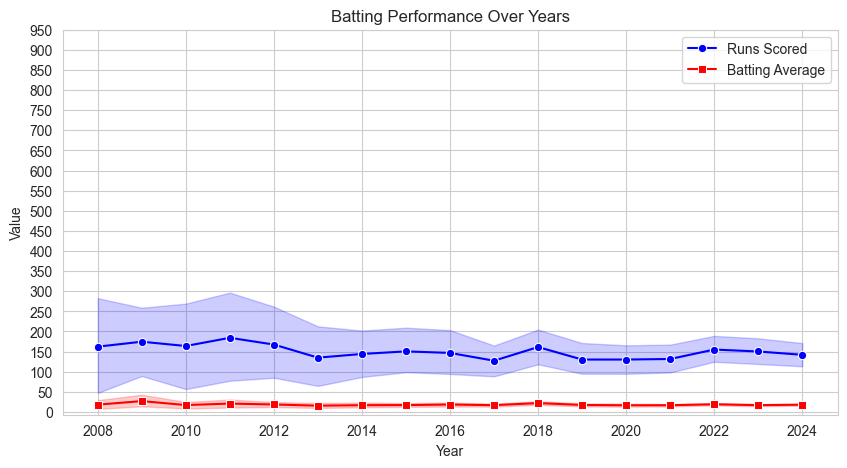

In [32]:
data['Runs_Scored'] = pd.to_numeric(data['Runs_Scored'], errors='coerce')
data['Batting_Average'] = pd.to_numeric(data['Batting_Average'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Runs_Scored', data=data, marker='o', label='Runs Scored', color='blue')
sns.lineplot(x='Year', y='Batting_Average', data=data, marker='s', label='Batting Average', color='red')
plt.title('Batting Performance Over Years')
plt.ylabel('Value')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

y_min, y_max = data[['Runs_Scored', 'Batting_Average']].min().min(), data[['Runs_Scored', 'Batting_Average']].max().max()
plt.yticks(np.arange(y_min, y_max + 1, step=50)) 

plt.show()


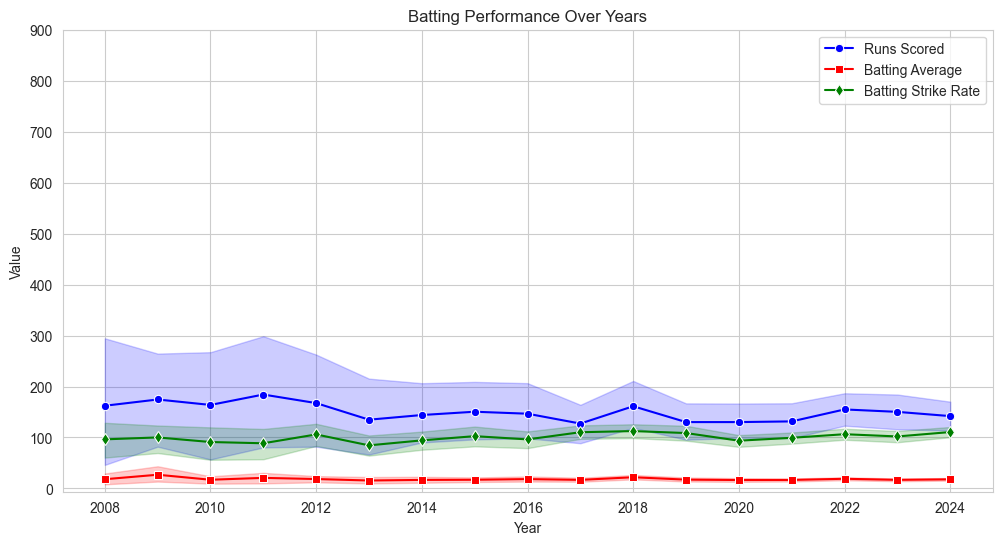

In [41]:
numeric_cols = ['Runs_Scored', 'Batting_Average', 'Batting_Strike_Rate']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Runs_Scored', data=data, marker='o', label='Runs Scored', color='blue')
sns.lineplot(x='Year', y='Batting_Average', data=data, marker='s', label='Batting Average', color='red')
sns.lineplot(x='Year', y='Batting_Strike_Rate', data=data, marker='d', label='Batting Strike Rate', color='green')

plt.title('Batting Performance Over Years')
plt.ylabel('Value')
plt.xlabel('Year')
y_min = data[numeric_cols].min().min()  
y_max = data[numeric_cols].max().max()

plt.yticks(np.arange(y_min, y_max + 1, step=100))  

plt.legend()
plt.grid(True)
plt.show()


/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_37973/2188458497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Runs_Scored', data=data, palette='coolwarm')


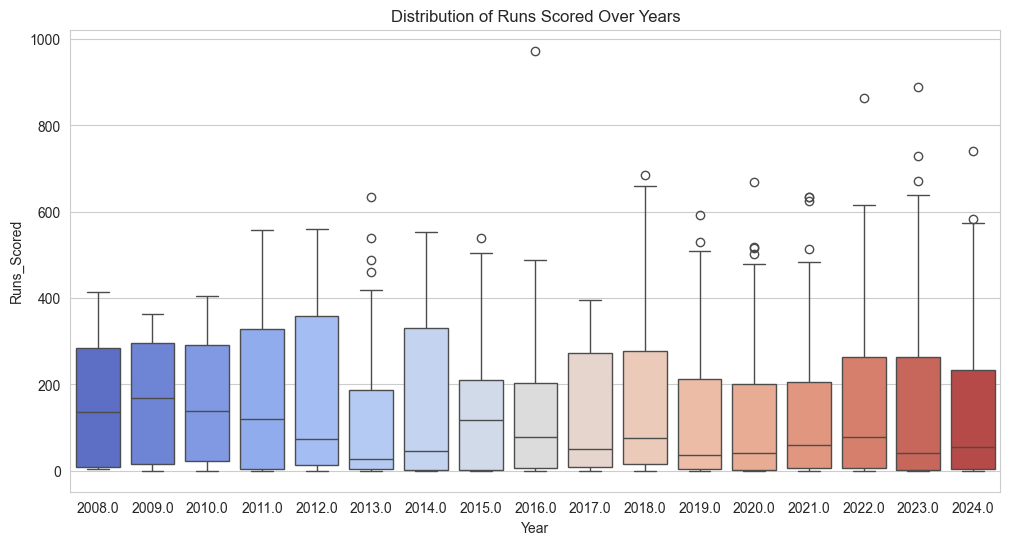

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Runs_Scored', data=data, palette='coolwarm')
plt.title("Distribution of Runs Scored Over Years")
plt.show()

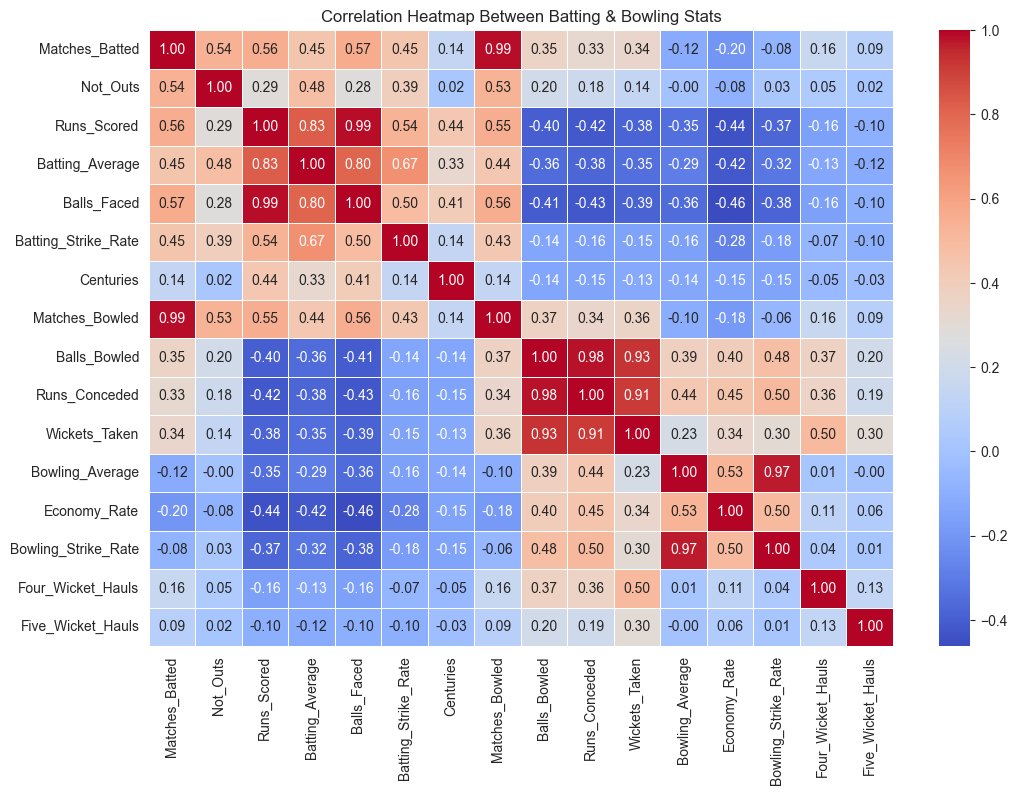

In [47]:
numeric_cols = ['Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Batting_Average', 'Balls_Faced',
                'Batting_Strike_Rate', 'Centuries', 'Matches_Bowled', 'Balls_Bowled',
                'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate',
                'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']

data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Batting & Bowling Stats")
plt.show()


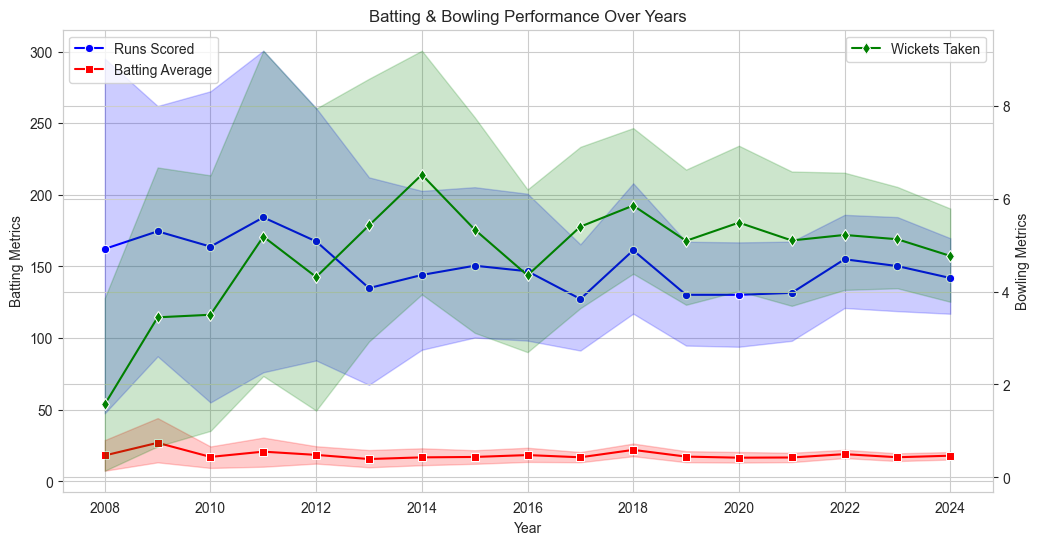

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Year', y='Runs_Scored', data=data, marker='o', label='Runs Scored', color='blue', ax=ax1)
sns.lineplot(x='Year', y='Batting_Average', data=data, marker='s', label='Batting Average', color='red', ax=ax1)

ax1.set_xlabel("Year")
ax1.set_ylabel("Batting Metrics")
ax1.legend(loc="upper left")
ax1.grid(True)
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Wickets_Taken', data=data, marker='d', label='Wickets Taken', color='green', ax=ax2)
ax2.set_ylabel("Bowling Metrics")

ax2.legend(loc="upper right")

plt.title("Batting & Bowling Performance Over Years")
plt.show()


/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_37973/2704406677.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Batting_Average'], shade=True, color='red', label="Batting Average")
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_37973/2704406677.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Batting_Strike_Rate'], shade=True, color='blue', label="Strike Rate")


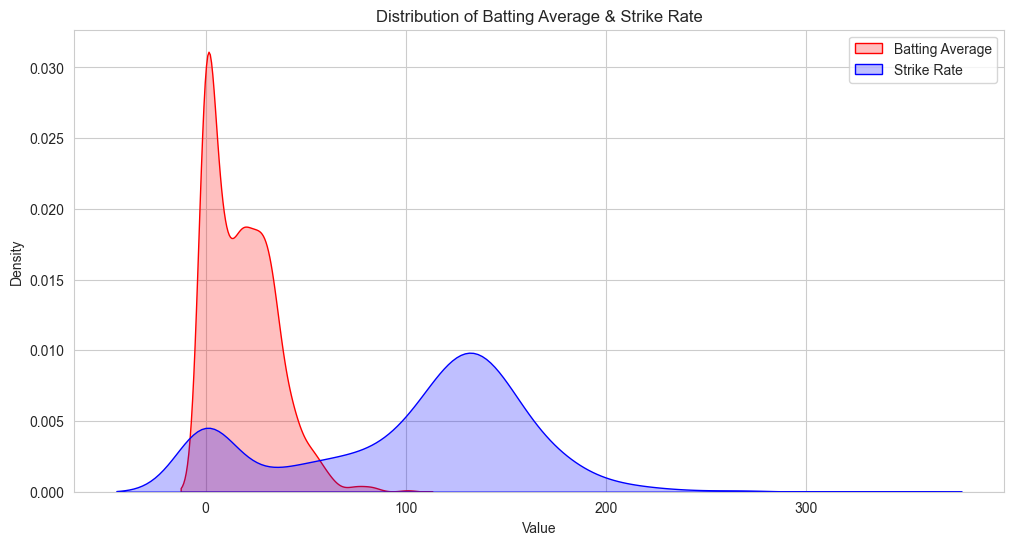

In [50]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data['Batting_Average'], shade=True, color='red', label="Batting Average")
sns.kdeplot(data['Batting_Strike_Rate'], shade=True, color='blue', label="Strike Rate")

plt.title("Distribution of Batting Average & Strike Rate")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


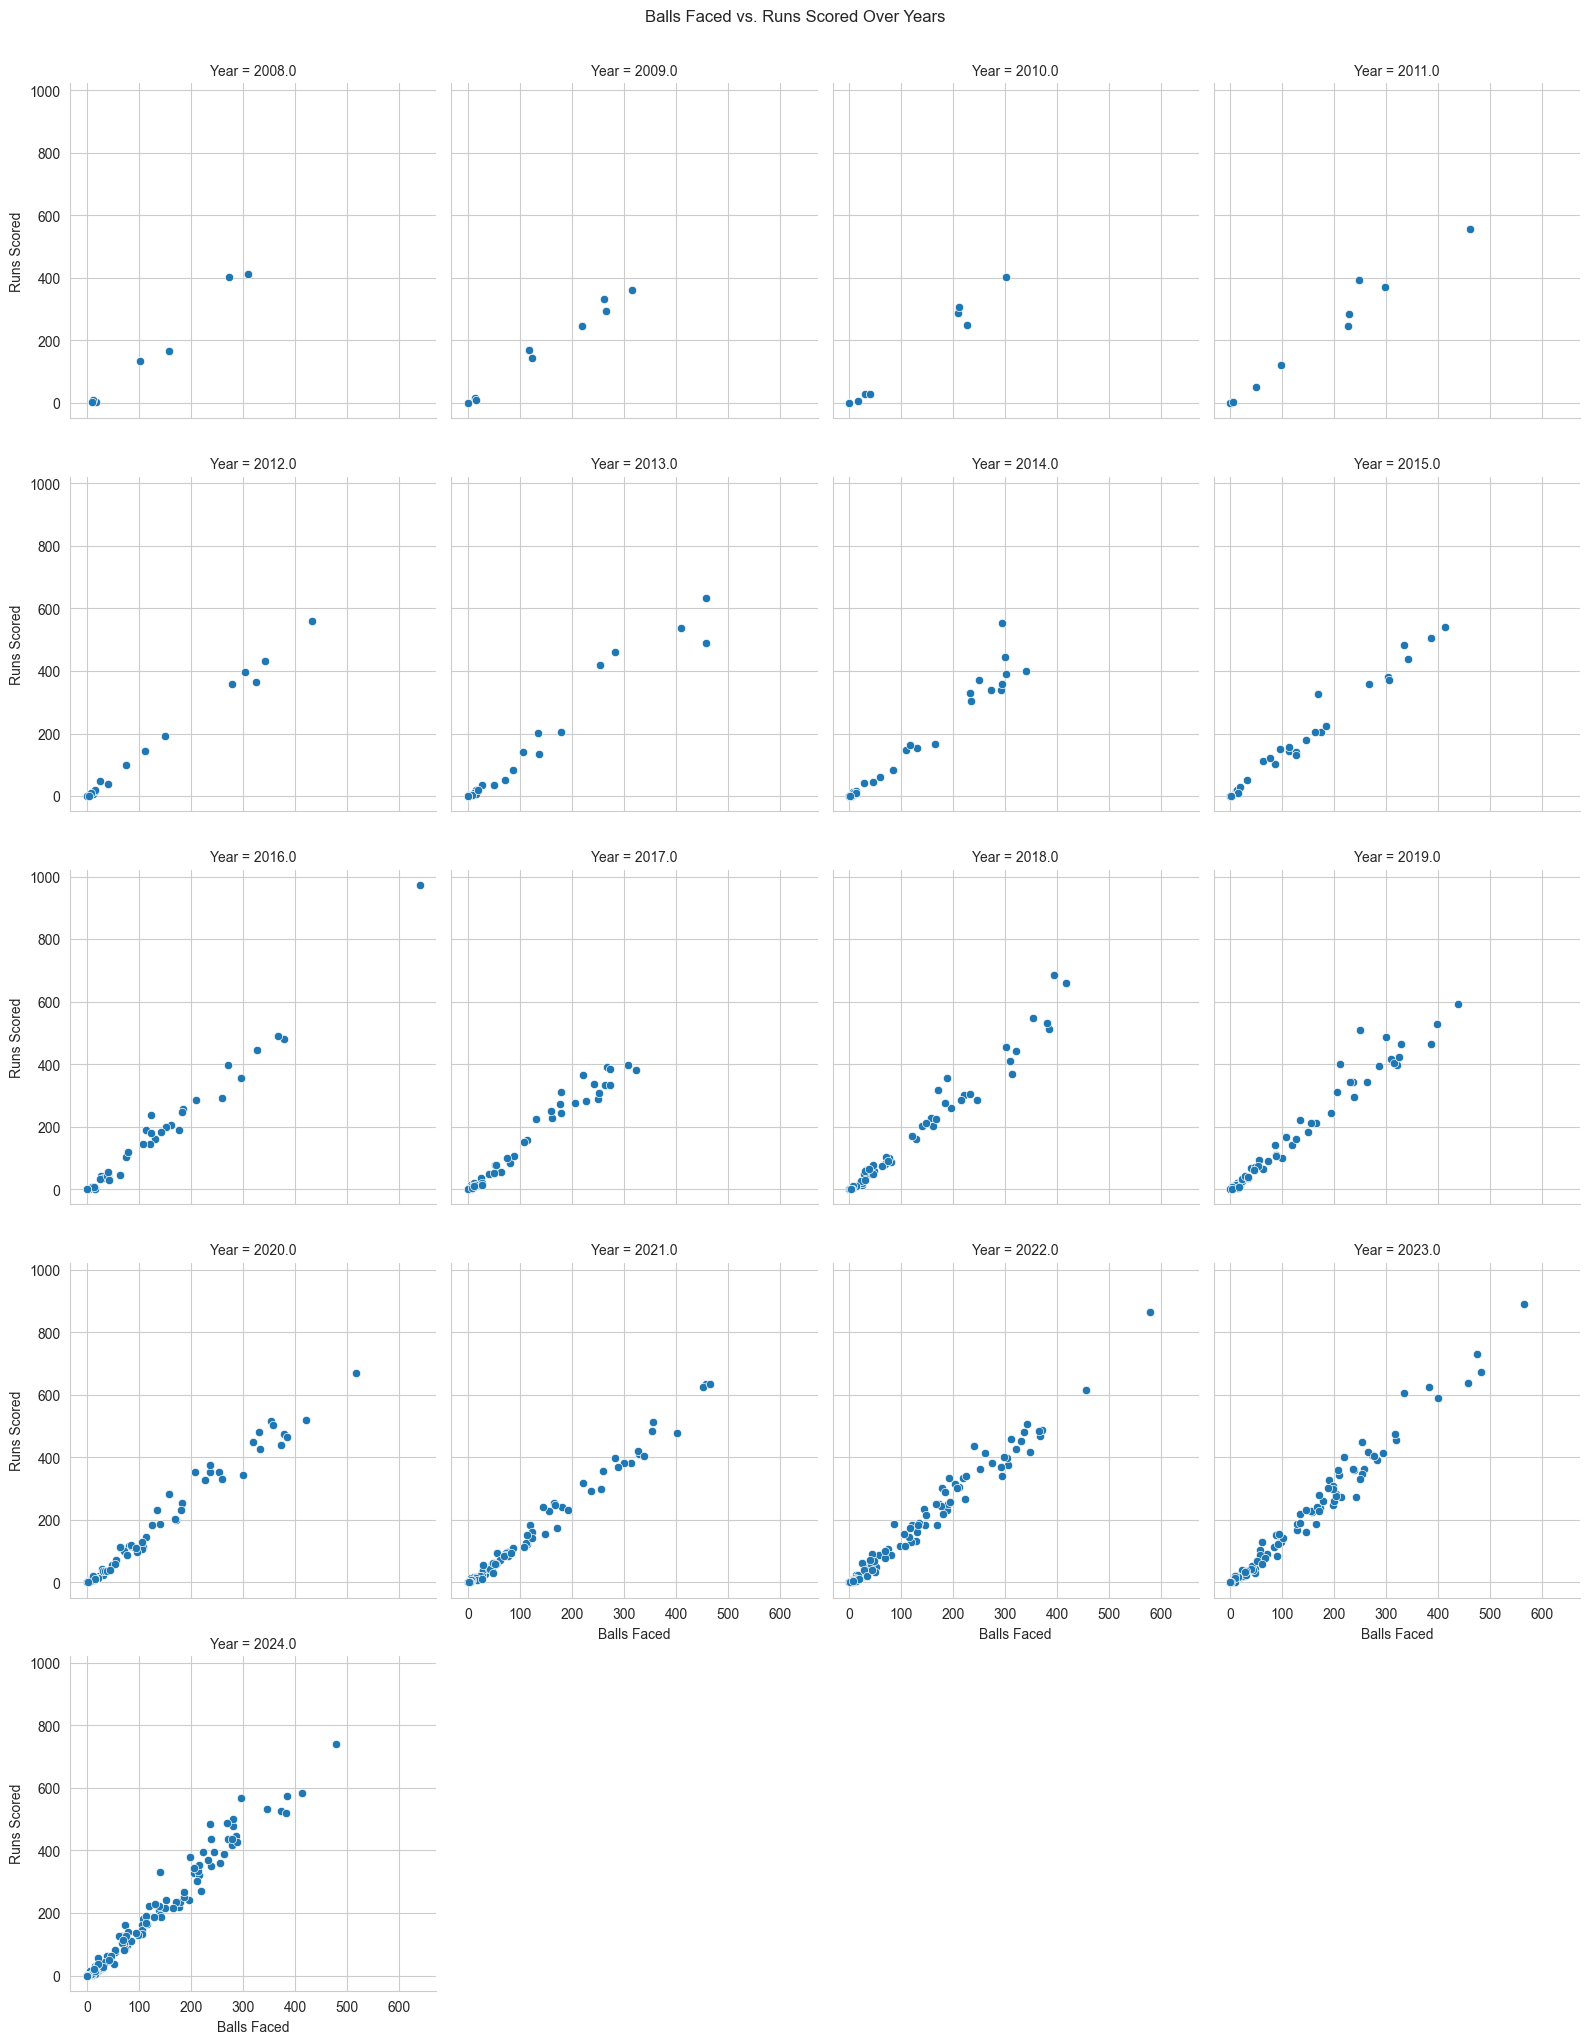

In [53]:
g = sns.FacetGrid(data, col="Year", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="Balls_Faced", y="Runs_Scored")
g.set_axis_labels("Balls Faced", "Runs Scored")
g.fig.suptitle("Balls Faced vs. Runs Scored Over Years", y=1.02)
plt.show()
